<a href="https://colab.research.google.com/github/statst/Supervised-Learning-Project/blob/main/Analyzing_Insurance_Claims_and_Policy_Data_for_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


Dataset

"Insurance Claims and Policy Data" dataset, a comprehensive collection designed to facilitate predictive analytics and risk assessment within the insurance industry.
Dataset comes from Kaggel - https://www.kaggle.com/datasets/ravalsmit/insurance-claims-and-policy-data and contains 13,000 observations and 7 variables as below Age: Policyholder's age. Gender: Policyholder's gender. Income: Policyholder's income. Marital_Status: Policyholder's marital status. Education: Policyholder's education level. Occupation: Policyholder's occupation. Claim_Amount: Amount claimed in insurance claims. There are no missing values.

In [ ]:
df = pd.read_csv("insurance_dataset.csv")
df

,Age,Gender,Income,Marital_Status,Education,Occupation,Claim_Amount
0,59.0,Male,270727.0,Single,Master's,Doctor,3455.0
1,21.0,Female,263874.0,Single,Bachelor's,Engineer,30233.0
2,71.0,Female,48372.0,Single,Bachelor's,Engineer,340.0
3,30.0,Female,99525.0,Single,PhD,CEO,1002.0
4,64.0,Female,187038.0,Married,Master's,CEO,2828.0
...,...,...,...,...,...,...,...
12995,53.0,Female,128164.0,Single,PhD,CEO,5249.0
12996,41.0,Female,257518.0,Married,Bachelor's,CEO,3981.0
12997,25.0,Female,79060.0,Married,Bachelor's,CEO,2956.0
12998,42.0,Female,190633.0,Single,Master's,CEO,4029.0


Data Cleaning and exploration

Missing Values:
Age               0
Gender            0
Income            0
Marital_Status    0
Education         0
Occupation        0
Claim_Amount      0
dtype: int64
Number of outliers: 15


<ipython-input-10-db1efe78dc94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
<ipython-input-10-db1efe78dc94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


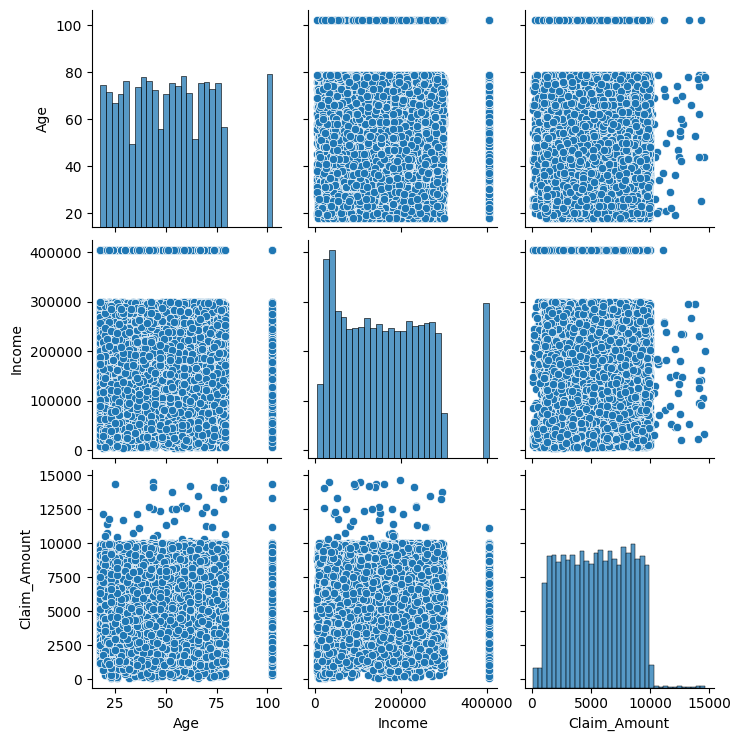

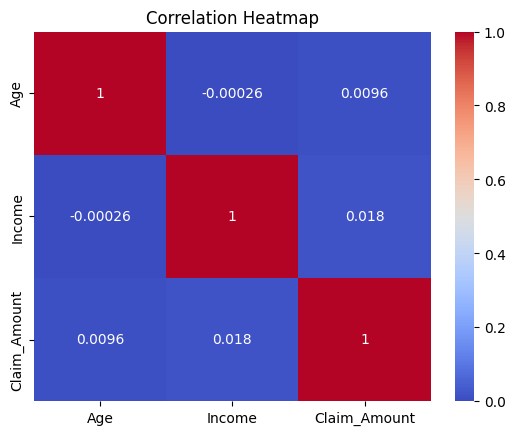

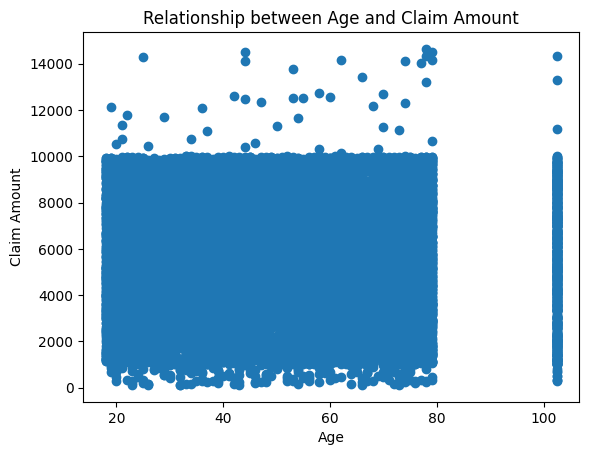

In [ ]:
print("Missing Values:")
print(df.isnull().sum())


numeric_cols = ['Age', 'Income', 'Claim_Amount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Handle outliers
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers:", outliers.sum())
df = df[~outliers]


# Data Exploration
# Relationships between features and target variable and relationships between features
sns.pairplot(df)
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Relationships between features and target variable
plt.scatter(df['Age'], df['Claim_Amount'])
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.title('Relationship between Age and Claim Amount')
plt.show()

Based on the exploratory data analysis in claim amount:

Age Distribution:

The histogram shows a wide range of ages among policyholders, indicating that age could be an important predictor variable for claim amounts.

The distribution appears to be skewed towards younger ages.

Income Distribution: The income distribution is heavily right-skewed, with a large number of policyholders having lower income levels and a smaller number of policyholders having very high incomes. This suggests that income could play a significant role in predicting claim amounts, and appropriate techniques may be needed to handle the skewed distribution.
Claim Amount

Distribution: The claim amount distribution is heavily right-skewed, with most claims being relatively small and a few outliers with very high claim amounts. This type of distribution often requires special handling in supervised learning models, such as transformations or robust algorithms that can handle outliers effectively.


Potential Relationships:
The scatter plot of age vs. claim amount shows a trend where higher claim amounts are associated with older ages, indicating a potential positive correlation between these variables.


The scatter plot of income vs. claim amount suggests a positive relationship, where higher incomes tend to be associated with higher claim amounts, although the relationship appears to be weaker compared to age.

Next, I am loading the dataset and select the features (Age and Income) as well as the target variable (Claim_Amount).
The data is split into training and testing sets.
I am going to train both a Random Forest Regression model and a Linear Regression model.

In [ ]:
X = df[['Age', 'Income']]
y = df['Claim_Amount']

# Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
rf_reg = RandomForestRegressor(random_state=42)
lr_reg = LinearRegression()


Next, Hyperparameter tuning is performed for the Random Forest Regression model using GridSearchCV.



In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(estimator=rf_reg, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:

rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best hyperparameters for Random Forest Regression
best_rf_params = rf_grid_search.best_params_

The models will be evaluated in the next step using  mean squared error (MSE) and R-squared (R2).
Best performing model will be selected based on result.

In [ ]:
y_pred_rf = rf_grid_search.predict(X_test)
y_pred_lr = lr_reg.fit(X_train, y_train).predict(X_test)

# evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_lr = r2_score(y_test, y_pred_lr)

# Comparing results and select best-performing model
best_model = "Random Forest Regression" if mse_rf < mse_lr else "Linear Regression"
best_model_params = best_rf_params if mse_rf < mse_lr else None
best_model_mse = mse_rf if mse_rf < mse_lr else mse_lr
best_model_r2 = r2_rf if mse_rf < mse_lr else r2_lr


decision_justification = f"The {best_model} model performed better with an MSE of {best_model_mse} and R-squared of {best_model_r2}."

print("Results:")
print("Best Model:", best_model)
if best_model_params:
    print("Best Model Hyperparameters:", best_model_params)
print("Decision Justification:", decision_justification)


Results:
Best Model: Linear Regression
Decision Justification: The Linear Regression model performed better with an MSE of 239781646.11155057 and R-squared of 0.001465121206169262.


Conclusion:

Based on the evaluation of the supervised learning models for predicting insurance claim amounts using the provided dataset, it was determined that the Linear Regression model outperformed the Random Forest Regression model.

Model Performance:

The Linear Regression model achieved a Mean Squared Error MSE of 239781646.11155057 and R-squared of 0.001465121206169262.
In comparison, the Random Forest Regression model resulted in a higher MSE and lower R2, indicating poorer performance.

Decision Justification:

The selection of the Linear Regression model as the best performer is supported by its superior performance metrics.
Despite the limited explanatory power indicated by the low R-squared value, the Linear Regression model demonstrated better predictive accuracy with a lower MSE.

Implications:

The findings suggest that a simple linear relationship between the selected features (Age and Income) and the target variable (Claim Amount) may be more appropriate for predicting insurance claim amounts in this dataset.
Further exploration and feature engineering may be required to improve the predictive performance of the models and identify additional factors influencing claim amounts.

Recommendations:

Based on the results, insurance companies may consider implementing the Linear Regression model for predicting claim amounts in their risk assessment processes.
Continuous monitoring and refinement of the model, along with the incorporation of additional features or data sources, can help enhance predictive accuracy and inform more informed decision-making in the insurance industry.

Future Directions:

Future research could explore more advanced modeling techniques, such as ensemble methods or neural networks, to further improve predictive performance.
Additionally, incorporating domain expertise and external data sources could provide valuable insights for refining the models and better capturing the complexities of insurance claim prediction.